In [145]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.spatial
import scipy.optimize as opt

def gaussian_kernel(X,Xprime, gamma=2):
    dists = scipy.spatial.distance.cdist(X,Xprime,metric='sqeuclidean')
    return np.exp(-gamma*dists)



<>:18: SyntaxWarning: invalid escape sequence '\g'
<>:28: SyntaxWarning: invalid escape sequence '\p'
<>:18: SyntaxWarning: invalid escape sequence '\g'
<>:28: SyntaxWarning: invalid escape sequence '\p'
/var/folders/sk/6zwfz76x0z34qpjtwyy0r7y40000gn/T/ipykernel_34718/3764298778.py:18: SyntaxWarning: invalid escape sequence '\g'
  ax.set_title(f'Kernel matrix ($\gamma$={gamma})')
/var/folders/sk/6zwfz76x0z34qpjtwyy0r7y40000gn/T/ipykernel_34718/3764298778.py:28: SyntaxWarning: invalid escape sequence '\p'
  ax.set_xlabel('$x^\prime$')


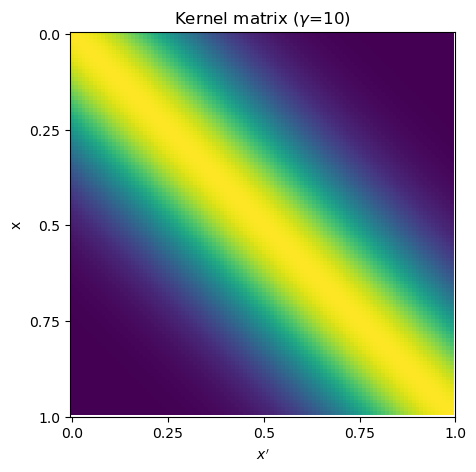

In [239]:
gamma = 10

#create meshgrid of x to construct the kernel matrix

X = np.linspace(0,1,100)
X = X[:,np.newaxis]

K = gaussian_kernel(X,X,gamma)

#display img of K
fig, ax = plt.subplots(1,1,figsize=(5,5))

# Display the image
cax = ax.imshow(K, interpolation='none')
#fig.colorbar(cax, ax=ax)

# Set the title
ax.set_title(f'Kernel matrix ($\gamma$={gamma})')

# Reset x and y axis to be the range of X instead of pixel indices
ax.set_xticks(np.linspace(0, 100, 5))
ax.set_xticklabels(np.linspace(0, 1, 5))
ax.set_yticks(np.linspace(0, 100, 5))
ax.set_yticklabels(np.linspace(0, 1, 5))

# Set x and y labels
ax.set_ylabel('x')
ax.set_xlabel('$x^\prime$')

# Show the plot
plt.savefig('figs/kernel_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
/var/folders/sk/6zwfz76x0z34qpjtwyy0r7y40000gn/T/ipykernel_34718/1852833627.py:12: SyntaxWarning: invalid escape sequence '\m'
  ax.set_title(f'Samples from the GP prior $p(f \mid S,\gamma$={gamma}))')


(100, 100)


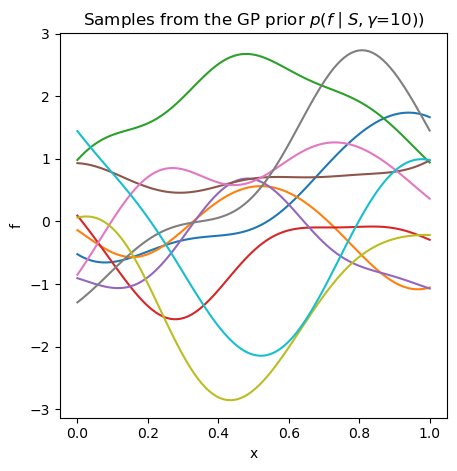

In [234]:

print(K.shape)

#sample from the prior

n_samples = 10

mu = np.zeros(K.shape[0])
f = np.random.multivariate_normal(mu,K,n_samples)

fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.plot(X,f.T)
ax.set_title(f'Samples from the GP prior $p(f \mid S,\gamma$={gamma}))')
ax.set_xlabel('x')
ax.set_ylabel('f')
plt.savefig('figs/prior_samples.png', dpi=300, bbox_inches='tight')
plt.show()



In [235]:
import pandas as pd

# Specify the column names
column_names = ['year', 'month', 'decimal_date', 'average', 'interpolated', 'trend', 'days']

x_column = 'decimal_date'
y_column = 'interpolated'

# Read the CSV file with the specified column names
df = pd.read_csv('co2_mm_mlo.csv', names=column_names, header=None, index_col=False)

/var/folders/sk/6zwfz76x0z34qpjtwyy0r7y40000gn/T/ipykernel_34718/2954337269.py:10: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv('co2_mm_mlo.csv', names=column_names, header=None, index_col=False)


In [236]:
columns = [x_column, y_column]
x_ = df[columns]

#x is from years 1958-1968
x = x_[x_[x_column].between(1958,1968)][[x_column]].values

#x_star is from 1968-1973
x_star = x_[x_[x_column].between(1968,1973)][[x_column]].values

y = x_[x_[x_column].between(1958,1968)][[y_column]].values - 1958
y_star = x_[x_[x_column].between(1968,1973)][[y_column]].values - 1958



In [237]:
#import normalizer
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler()
y_scaler = StandardScaler()

x = x_scaler.fit_transform(x)
y = y_scaler.fit_transform(y)

x_star = x_scaler.transform(x_star)
#y_star = y_scaler.transform(y_star)



<>:66: SyntaxWarning: invalid escape sequence '\m'
<>:66: SyntaxWarning: invalid escape sequence '\s'
<>:67: SyntaxWarning: invalid escape sequence '\m'
<>:67: SyntaxWarning: invalid escape sequence '\s'
<>:66: SyntaxWarning: invalid escape sequence '\m'
<>:66: SyntaxWarning: invalid escape sequence '\s'
<>:67: SyntaxWarning: invalid escape sequence '\m'
<>:67: SyntaxWarning: invalid escape sequence '\s'
/var/folders/sk/6zwfz76x0z34qpjtwyy0r7y40000gn/T/ipykernel_34718/2774138230.py:66: SyntaxWarning: invalid escape sequence '\m'
  ax[0].set_title(f"Posterior Samples $f^* \mid y, S, \gamma={gamma}, \sigma^2={noise_y}$")
/var/folders/sk/6zwfz76x0z34qpjtwyy0r7y40000gn/T/ipykernel_34718/2774138230.py:66: SyntaxWarning: invalid escape sequence '\s'
  ax[0].set_title(f"Posterior Samples $f^* \mid y, S, \gamma={gamma}, \sigma^2={noise_y}$")
/var/folders/sk/6zwfz76x0z34qpjtwyy0r7y40000gn/T/ipykernel_34718/2774138230.py:67: SyntaxWarning: invalid escape sequence '\m'
  ax[1].set_title(f"Posteri

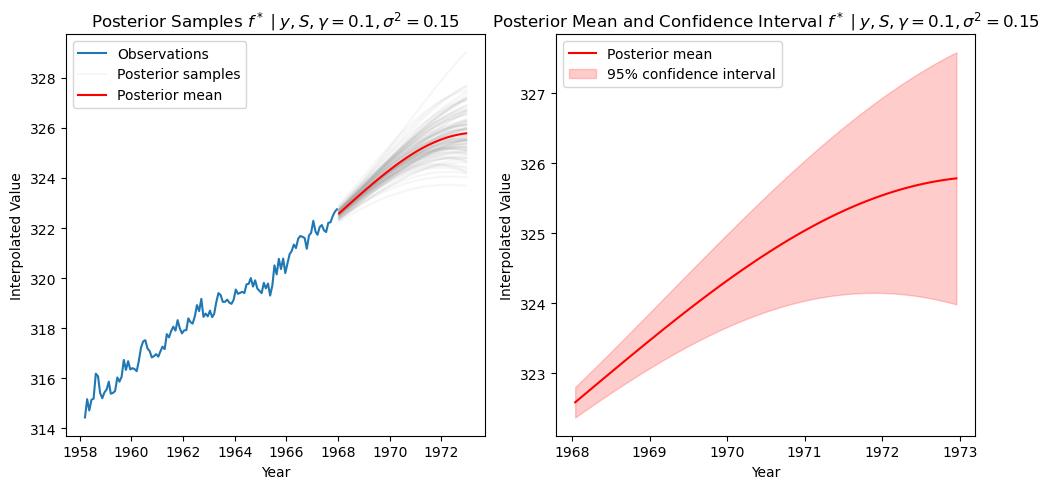

In [238]:
kernel = gaussian_kernel
gamma = 0.1
noise_y = 0.15

#using eq. 75 in the lecture notes to compute the posterior mean and covariance for f star given y
#f_star is normally distributed with mean m_star and covariance S_star
#mean_posterior = K_x_x_star * (Kxx + noise_y^2 * I)^-1 * y
#variance_posterior = K_x_x_star - K_x_x_star * (Kxx + noise_y^2 * I)^-1 * K_x_x_star.T

K_S = kernel(x, x, gamma)
G = np.linalg.inv(K_S + noise_y**2 * np.eye(K_S.shape[0]))
alpha = G @ y

K_S_x_star = kernel(x, x_star, gamma)
K_x_star_x_star = kernel(x_star, x_star, gamma)

m_star = K_S_x_star.T @ alpha
m_star = m_star.flatten() 
var_star = K_x_star_x_star - K_S_x_star.T @ G @ K_S_x_star
var_star += 1e-6 * np.eye(var_star.shape[0])

std_star = np.sqrt(np.diag(var_star))
conf95 = 1.96 * std_star

n_samples = 100
f_star = np.random.multivariate_normal(m_star.flatten(), var_star, n_samples)

# Inverse transform for x and y
x_orig = x_scaler.inverse_transform(x)  # Original x (training data)
y_orig = y_scaler.inverse_transform(y) + 1958  # Add the offset back

x_star_orig = x_scaler.inverse_transform(x_star)  # Original x_star
m_star_orig = y_scaler.inverse_transform(m_star.reshape(-1, 1)).flatten() + 1958  # Add offset
f_star_orig = y_scaler.inverse_transform(f_star.T).T + 1958  # Add offset for sampled functions
conf95_orig_lower = y_scaler.inverse_transform((m_star - conf95).reshape(-1, 1)).flatten() + 1958
conf95_orig_upper = y_scaler.inverse_transform((m_star + conf95).reshape(-1, 1)).flatten() + 1958

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax = ax.ravel()

# Plot original training data
ax[0].plot(x_orig, y_orig, label='Observations')

# Plot original predictions with posterior samples
for i in range(n_samples):
    if i == 0:
        # Plot the first sample with a label
        ax[0].plot(x_star_orig, f_star_orig[i, :], color='darkgrey', alpha=0.1, label='Posterior samples')
    else:
        ax[0].plot(x_star_orig, f_star_orig[i, :], color='darkgrey', alpha=0.1)

# Plot posterior mean and confidence interval
ax[0].plot(x_star_orig, m_star_orig, color='red', label='Posterior mean')
ax[1].plot(x_star_orig, m_star_orig, color='red', label='Posterior mean')
ax[1].fill_between(
    x_star_orig.flatten(),
    conf95_orig_lower,
    conf95_orig_upper,
    color='red',
    alpha=0.2,
    label='95% confidence interval'
)

# Labels and legends
ax[0].set_title(f"Posterior Samples $f^* \mid y, S, \gamma={gamma}, \sigma^2={noise_y}$")
ax[1].set_title(f"Posterior Mean and Confidence Interval $f^* \mid y, S, \gamma={gamma}, \sigma^2={noise_y}$")
for a in ax:
    a.set_xlabel("Year")
    a.set_ylabel("Interpolated Value")
    a.legend()

plt.tight_layout()
plt.savefig('figs/posterior_samples.png', dpi=300, bbox_inches='tight')
plt.show()



